In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [6]:
X_train = pd.read_csv('../data/train.csv', index_col=0)
X_test = pd.read_csv('../data/test.csv', index_col=0)

In [7]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,...,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,...,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75


In [12]:
selected_features = pd.read_csv('../data/selected_features.csv', index_col=0)

In [76]:
features = [feature[0] for feature in selected_features.values]

In [77]:
features = features + ['LotFrontage']
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [78]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = Lasso(alpha=0.005, random_state=0)

In [79]:
lin_reg.fit(X_train[features], X_train['SalePrice'])
predictions = lin_reg.predict(X_test[features])

In [80]:
mse = mean_squared_error(np.exp(X_test['SalePrice']), np.exp(predictions))
r2 = r2_score(np.exp(X_test['SalePrice']), np.exp(predictions))

print('Mean Squared Error: ', mse)
print('R square (%): ', r2*100)

Mean Squared Error:  1405259552.2596052
R square (%):  79.55128088451103


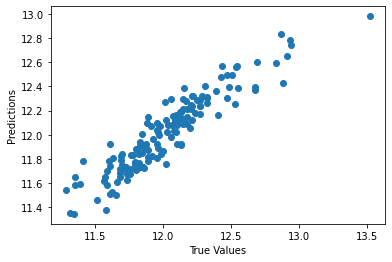

In [81]:
plt.scatter(X_test['SalePrice'], predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

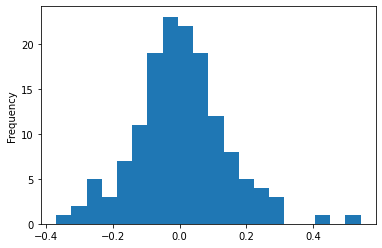

In [82]:
errors = X_test['SalePrice'] - predictions
errors.plot(kind = 'hist', bins=20)
plt.show()

In [90]:
importances = pd.Series({k:v for k,v in zip(features, lin_reg.coef_)})

In [101]:
top_importances = pd.concat([importances.sort_values(ascending=False)[:5], importances.sort_values()[:5]])


<AxesSubplot:>

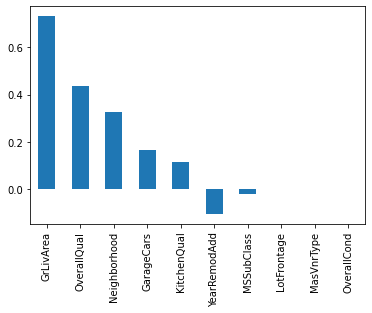

In [103]:
top_importances.plot(kind='bar')